In [46]:
import os
import sys
import importlib
if '../utils' not in sys.path:
    sys.path.insert(0,'../utils')
import lmp
import lmpsetup
import analysis
import numpy as np
import matplotlib.pyplot as plt

importlib.reload(lmp);
importlib.reload(lmpsetup);
importlib.reload(analysis);

### CPEB4

Run Completed at 38.70 %
Run Completed at 39.45 %


No handles with labels found to put in legend.


Run Completed at 34.26 %


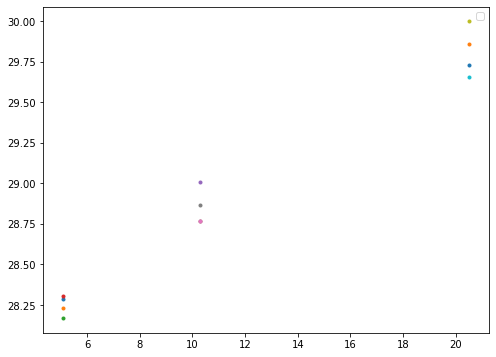

In [47]:
long_dirs = ['/home/adria/perdiux/prod/lammps/dignon/LONG/LONG-I_cpeb4/0.051',
            '/home/adria/perdiux/prod/lammps/dignon/LONG/LONG-I_cpeb4/0.103',
            '/home/adria/perdiux/prod/lammps/dignon/LONG/LONG-I_cpeb4/0.205']
long_rgs = {}
plt.figure(num=None, figsize=(8,6))
n_blocks = 5
for ld in long_dirs:
    cpeb = analysis.Analysis(oliba_wd=ld)
    rgs = np.array(cpeb.rg_from_lmp())
    I = float(os.path.basename(ld))*1000
    long_rgs[I] = rgs
    rgs = rgs[0]
    b = np.linspace(0, rgs.shape, n_blocks, dtype='int')
    for i in range(1, b.shape[0]):
#         print(b[i][0], rgs.shape)
#         print(b[i-1][0], b[i][0])
        rgsc = rgs[b[i-1][0]:b[i][0]]
#         plt.plot(I, rgsc.mean(), '.', label=f'{I:.0f}')
        plt.plot(I, rgsc.mean(), '.')
#     plt.plot(I, rgsc.mean(), '.')
plt.legend();

No handles with labels found to put in legend.


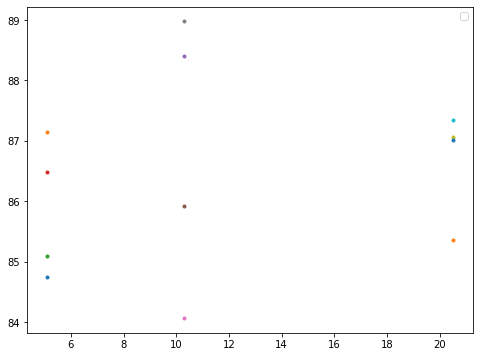

In [3]:
l0_long_dirs = ['/home/adria/perdiux/prod/lammps/dignon/LONG/L0-LONG-I_cpeb4/0.051',
            '/home/adria/perdiux/prod/lammps/dignon/LONG/L0-LONG-I_cpeb4/0.103',
            '/home/adria/perdiux/prod/lammps/dignon/LONG/L0-LONG-I_cpeb4/0.205']
l0_long_rgs = {}
plt.figure(num=None, figsize=(8,6))
n_blocks = 5
for ld in l0_long_dirs:
    l0cpeb = analysis.Analysis(oliba_wd=ld)
    rgs = np.array(l0cpeb.rg_from_lmp())
    l0_long_rgs[os.path.basename(ld)*100] = rgs
    rgs =rgs[0]
    I = float(os.path.basename(ld))*100
    b = np.linspace(0, rgs.shape, n_blocks, dtype='int')
    for i in range(1, b.shape[0]):
        rgsc = rgs[b[i-1][0]:b[i][0]]
        plt.plot(I, rgsc.mean(), '.')
#     plt.plot(I, rgs.mean(), '.', label=f'{I:.0f}')
plt.legend();

### hnRNAP

Run Completed at 100.00 %
Run Completed at 69.42 %
Run Completed at 73.39 %


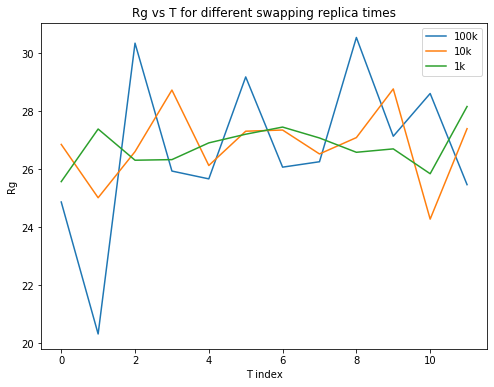

In [64]:
importlib.reload(lmp);
importlib.reload(analysis);

#Swap every 100k
wd1 ='/home/adria/perdiux/prod/lammps/dignon/hnRPA/RE-T-hnRPA'
re1 = analysis.Analysis(oliba_wd=wd1, temper=True)
#Swap every 10k
wd2 ='/home/adria/perdiux/prod/lammps/dignon/hnRPA/2RE-T-hnRPA'
re2 = analysis.Analysis(oliba_wd=wd2, temper=True)
#Swap every 1k
wd3 ='/home/adria/perdiux/prod/lammps/dignon/hnRPA/3RE-T-hnRPA'
re3 = analysis.Analysis(oliba_wd=wd3, temper=True)

fig = plt.figure(num=None, figsize=(8, 6), frameon=False)
plt.ylabel("Rg")
plt.xlabel("T index")
plt.title("Rg vs T for different swapping replica times")
plt.plot(re1.rg_from_lmp().mean(axis=1), label='100k');
plt.plot(re2.rg_from_lmp().mean(axis=1), label='10k');
plt.plot(re3.rg_from_lmp().mean(axis=1), label='1k');
plt.legend();

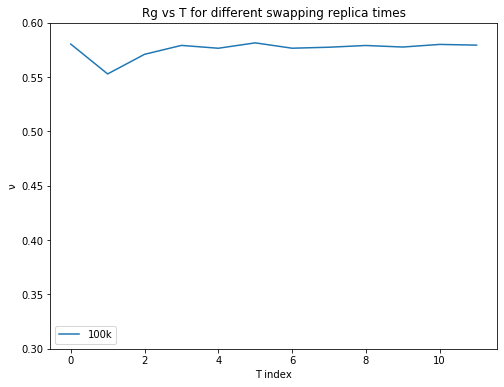

In [98]:
importlib.reload(lmp);
importlib.reload(analysis);

#Swap every 100k
wd1 ='/home/adria/perdiux/prod/lammps/dignon/hnRPA/RE-T-hnRPA'
re1 = analysis.Analysis(oliba_wd=wd1, temper=True)
#Swap every 10k
wd2 ='/home/adria/perdiux/prod/lammps/dignon/hnRPA/2RE-T-hnRPA'
re2 = analysis.Analysis(oliba_wd=wd2, temper=True)
#Swap every 1k
wd3 ='/home/adria/perdiux/prod/lammps/dignon/hnRPA/3RE-T-hnRPA'
re3 = analysis.Analysis(oliba_wd=wd3, temper=True)

fig = plt.figure(num=None, figsize=(8, 6), frameon=False)
plt.ylabel("ν")
plt.xlabel("T index")
plt.title("Rg vs T for different swapping replica times")
plt.plot(re1.flory_scaling_fit(r0=5.5)[0], label='100k');
plt.ylim((0.3,0.6))
# None by mistake
# plt.plot(re2.flory_scaling_fit(r0=5.5)[0], label='10k');
# None by mistake
# plt.plot(re3.flory_scaling_fit(r0=5.5)[0], label='1k');
plt.legend();

Dignon's results

!["FigA"](img/FigA.png)

Replica with swapping every 100k fs


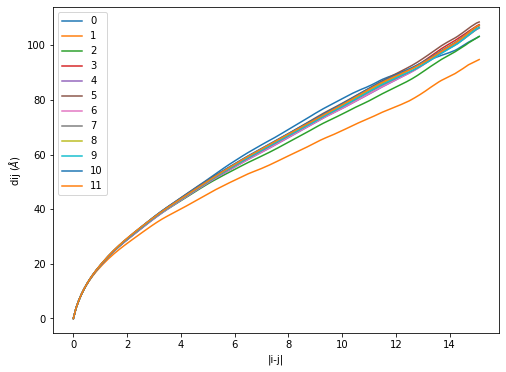

In [44]:
fig = plt.figure(num=None, figsize=(8, 6), frameon=False)
ijs, means = re1.ij_from_contacts()
for i, ij in enumerate(ijs):
    mean = means[i]
    plt.xlabel("|i-j|")
    plt.ylabel(r'dij ($\AA$)')
    plt.plot(ij, mean/10, label=i)
plt.legend();

Swapping every 10k

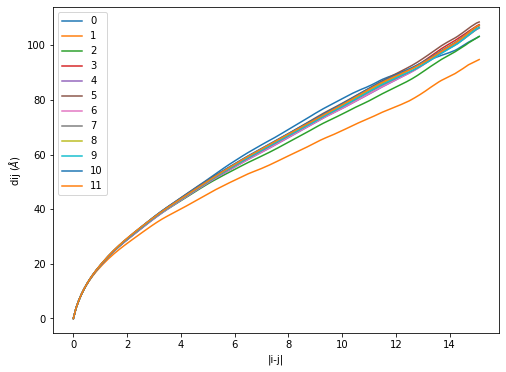

In [48]:
fig = plt.figure(num=None, figsize=(8, 6), frameon=False)
ijs, means = re2.ij_from_contacts()
for i, ij in enumerate(ijs):
    mean = means[i]
    plt.xlabel("|i-j|")
    plt.ylabel(r'dij ($\AA$)')
    plt.plot(ij/10, mean, label=i)
plt.legend();

Swapping every 1k

No handles with labels found to put in legend.


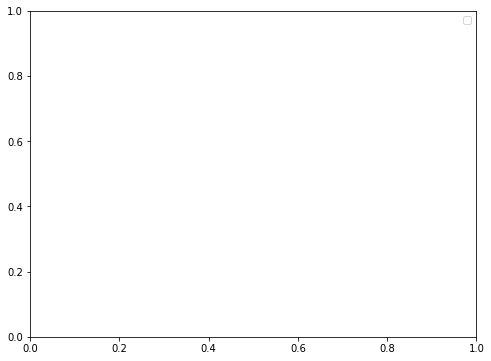

In [148]:
fig = plt.figure(num=None, figsize=(8, 6), frameon=False)
ijs, means = re3.ij_from_contacts()
for i, ij in enumerate(ijs):
    mean = means[i]
    plt.xlabel("|i-j|")
    plt.ylabel(r'dij ($\AA$)')
    plt.plot(ij/10, mean, label=i)
plt.legend();

!["FigB"](img/FigB.png)

### T-hnRPA


Run Completed at 100.00 %
Run Completed at 100.00 %
Run Completed at 100.00 %
Run Completed at 100.00 %
Run Completed at 100.00 %
Run Completed at 100.00 %
Run Completed at 100.00 %
Run Completed at 100.00 %
Run Completed at 100.00 %
Run Completed at 100.00 %


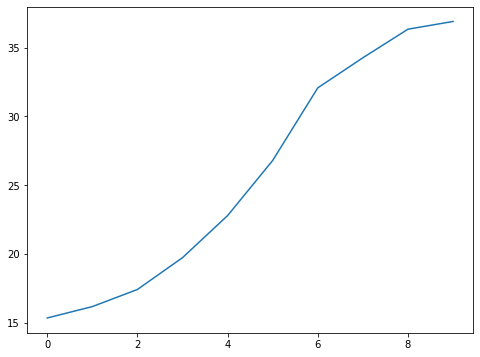

In [97]:
tt = '/home/adria/perdiux/prod/lammps/dignon/hnRPA/T-hnRPA'
re4 = analysis.Analysis(oliba_wd=tt, temper=False)
fig = plt.figure(num=None, figsize=(8, 6), frameon=False)
rgs = re4.rg_from_lmp()
rgs.shape
plt.plot(rgs.mean(axis=1))


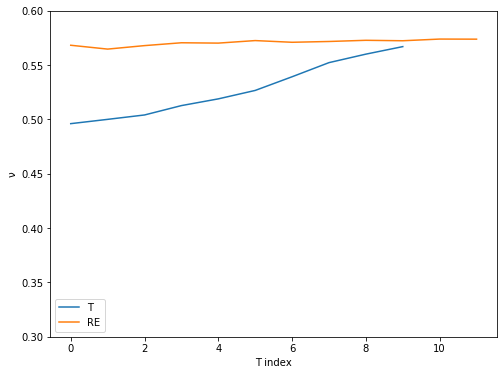

In [100]:
importlib.reload(lmp);
importlib.reload(analysis);
fig = plt.figure(num=None, figsize=(8, 6), frameon=False)


tt = '/home/adria/perdiux/prod/lammps/dignon/hnRPA/T-hnRPA'
re4 = analysis.Analysis(oliba_wd=tt, temper=False)
wd1 ='/home/adria/perdiux/prod/lammps/dignon/hnRPA/RE-T-hnRPA'
re1 = analysis.Analysis(oliba_wd=wd1, temper=True)
plt.plot(re4.flory_scaling_fit(r0=5.5)[0], label='T');
plt.plot(re1.flory_scaling_fit(r0=5.5)[0], label='RE');
plt.ylabel("ν")
plt.ylim(0.3, 0.6)
plt.xlabel("T index")
plt.legend()

!["FigA"](img/FigA.png)

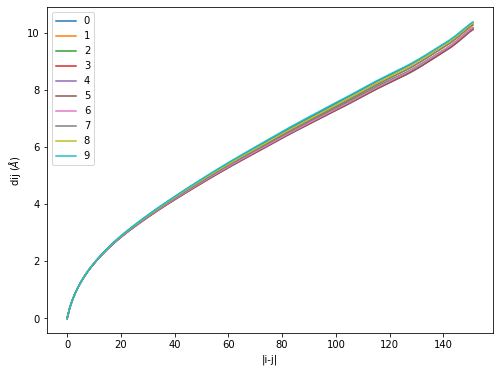

In [101]:
tt = '/home/adria/perdiux/prod/lammps/dignon/hnRPA/T-hnRPA'
re4 = analysis.Analysis(oliba_wd=tt, temper=False)
fig = plt.figure(num=None, figsize=(8, 6), frameon=False)
ijs, means = re4.ij_from_contacts()
for i, ij in enumerate(ijs):
    mean = means[i]
    plt.xlabel("|i-j|")
    plt.ylabel(r'dij ($\AA$)')
    plt.plot(ij, mean/10, label=i)
plt.legend();

!["FigB"](img/FigB.png)